In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
from sklearn.cluster import KMeans

from standard_pca_implementation import get_clustering_accuracy
from standard_pca_implementation import get_pred_labels
from standard_pca_implementation import run_clustering

import warnings
warnings.filterwarnings('ignore')

# Standard PCA implementation
### Paper implementation vs Sklearn: Newspaper dataset

In [2]:
from newspaper_data import get_data_papers

Combination A2

PCA_Implementation Accuracy 73.50% / Sklearn Reference Accuracy 92.00%


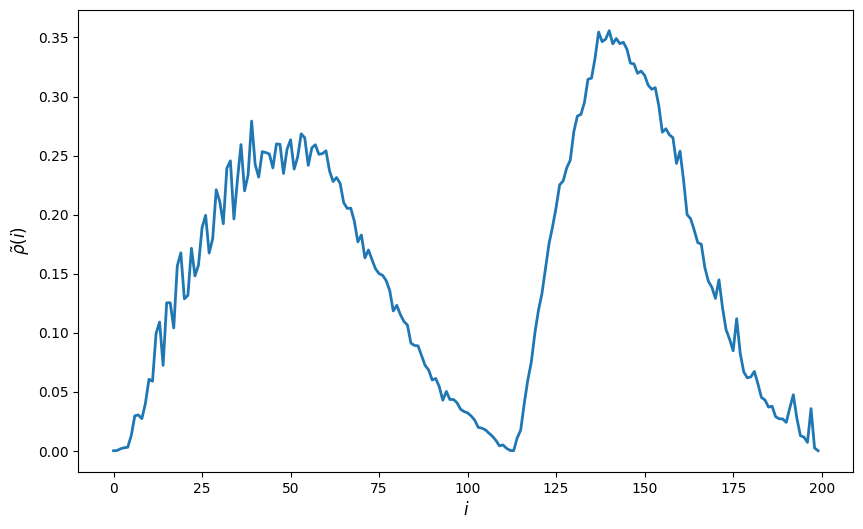

PCA_Implementation Accuracy 77.00% / Sklearn Reference Accuracy 80.00%


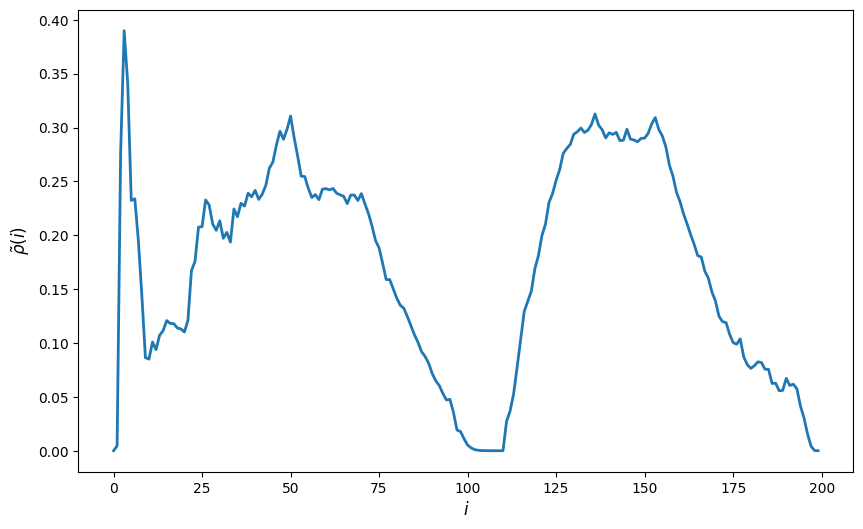

PCA_Implementation Accuracy 79.00% / Sklearn Reference Accuracy 81.00%


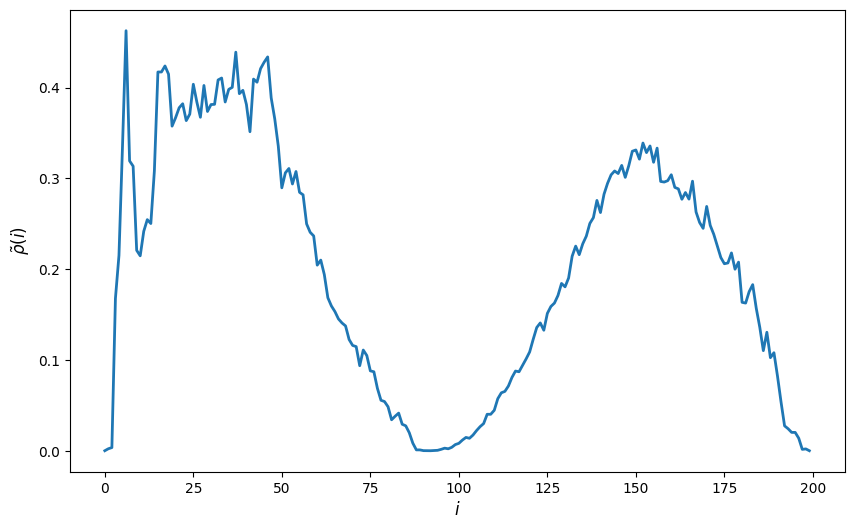

PCA_Implementation Accuracy 79.00% / Sklearn Reference Accuracy 80.00%


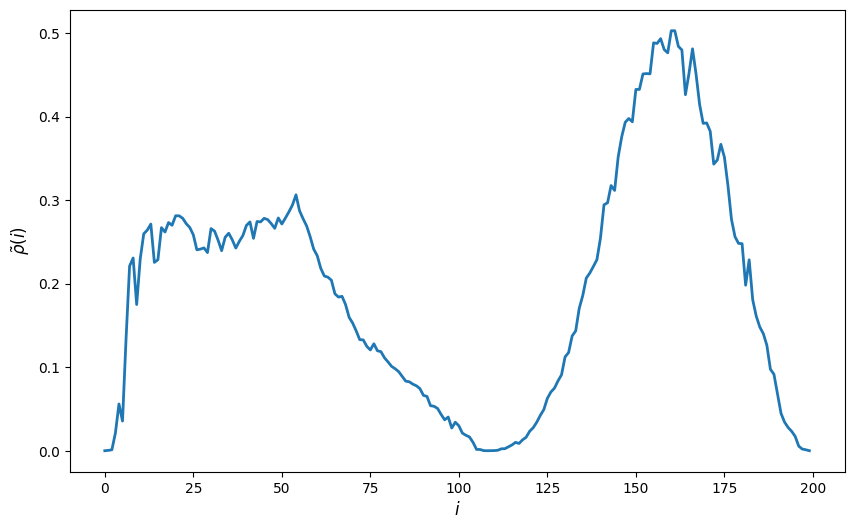

PCA_Implementation Accuracy 83.00% / Sklearn Reference Accuracy 86.50%


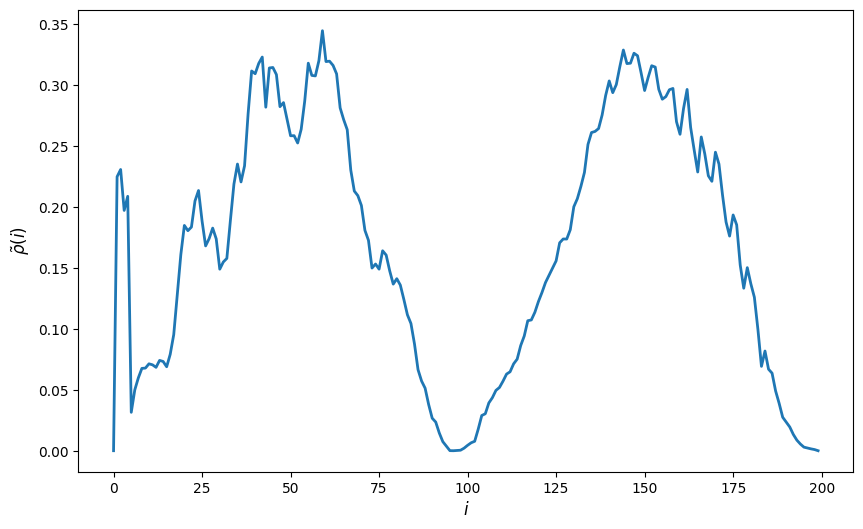

PCA_Implementation Accuracy 76.00% / Sklearn Reference Accuracy 92.00%


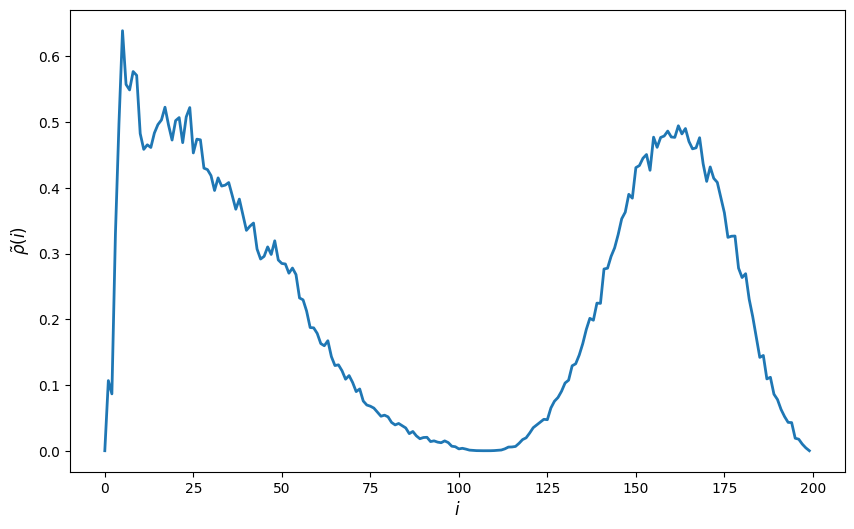

PCA_Implementation Accuracy 81.50% / Sklearn Reference Accuracy 79.00%


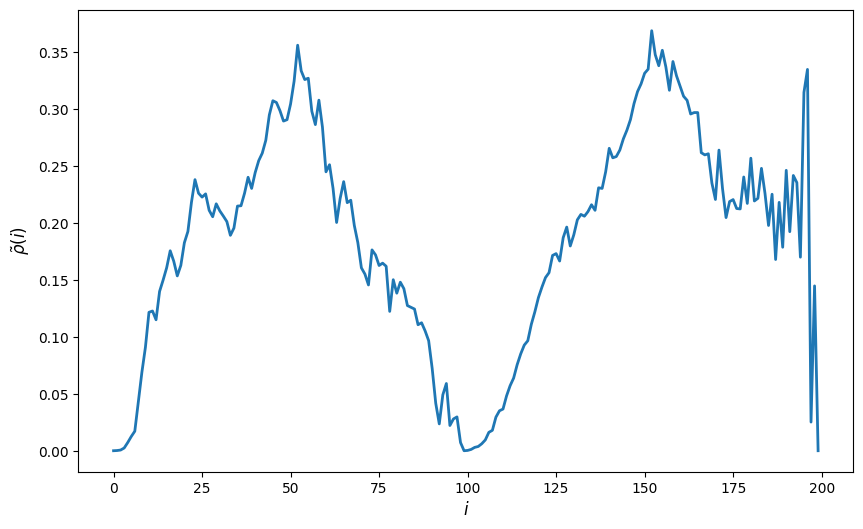

PCA_Implementation Accuracy 70.00% / Sklearn Reference Accuracy 71.00%


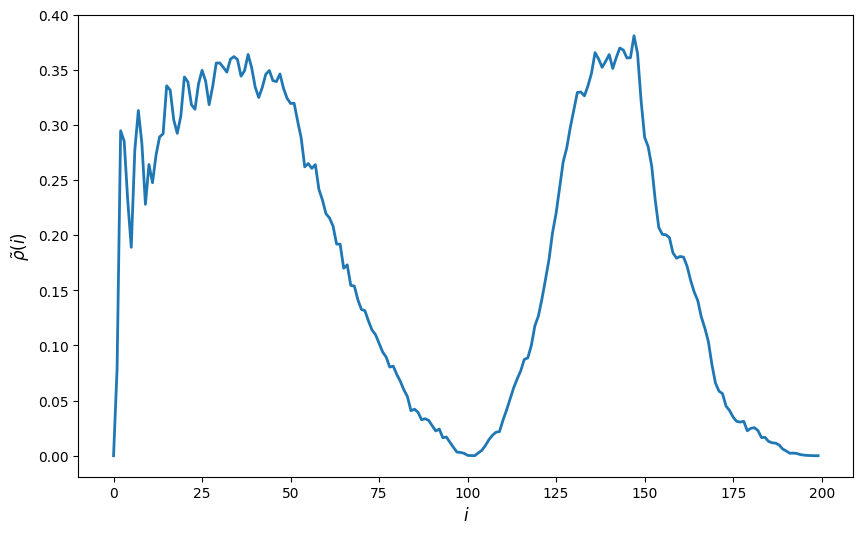

PCA_Implementation Accuracy 82.50% / Sklearn Reference Accuracy 84.50%


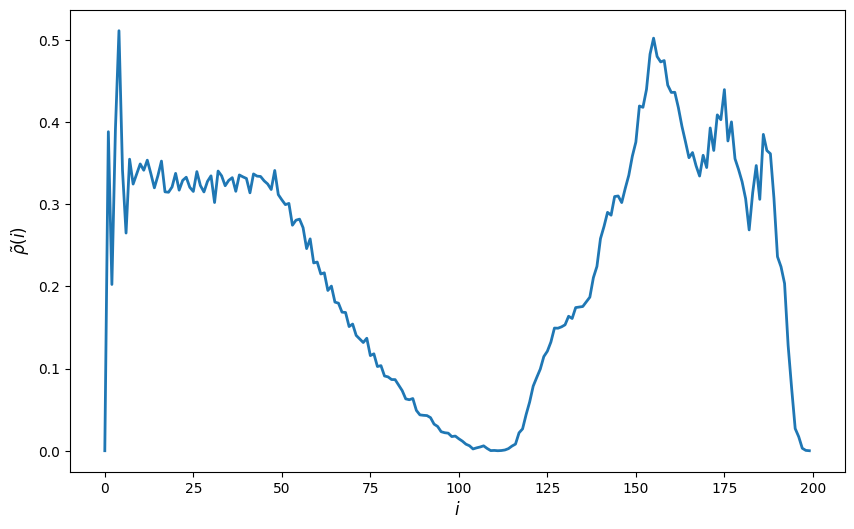

PCA_Implementation Accuracy 80.00% / Sklearn Reference Accuracy 74.00%


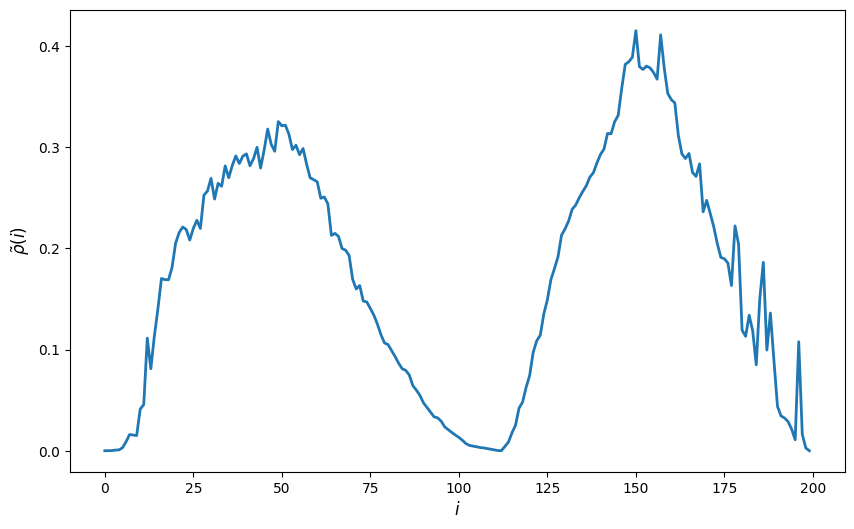


PCA_Implementation Mean Accuracy 78.15% / Sklearn Reference Mean Accuracy 82.00%

 Metric                                                                           Values
Inertia [160.81, 157.12, 159.21, 162.97, 161.59, 161.39, 159.57, 159.13, 163.98, 163.00]
     Km [160.76, 157.04, 159.20, 162.99, 161.51, 161.42, 159.53, 159.09, 164.04, 163.02]
  LowBd [158.47, 154.82, 156.72, 160.93, 159.71, 159.43, 157.50, 156.62, 162.45, 160.94]

###################################################################################################

Combination B2

PCA_Implementation Accuracy 65.00% / Sklearn Reference Accuracy 64.50%


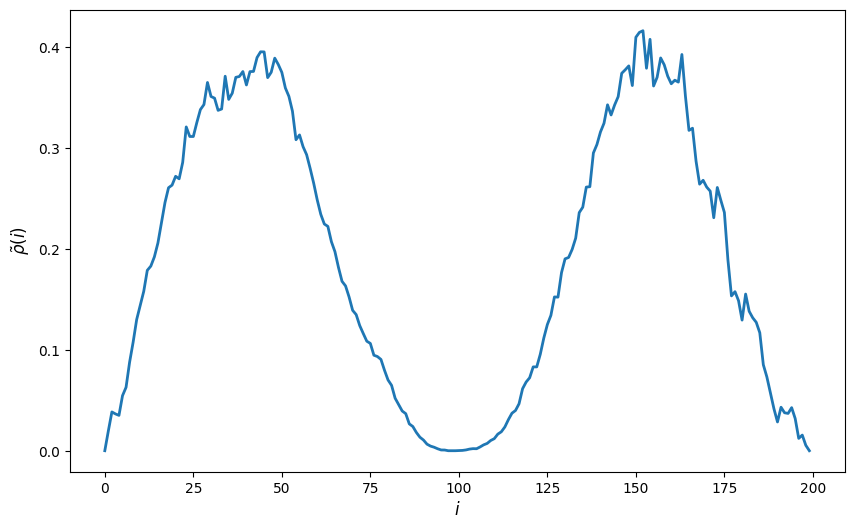

PCA_Implementation Accuracy 64.00% / Sklearn Reference Accuracy 66.00%


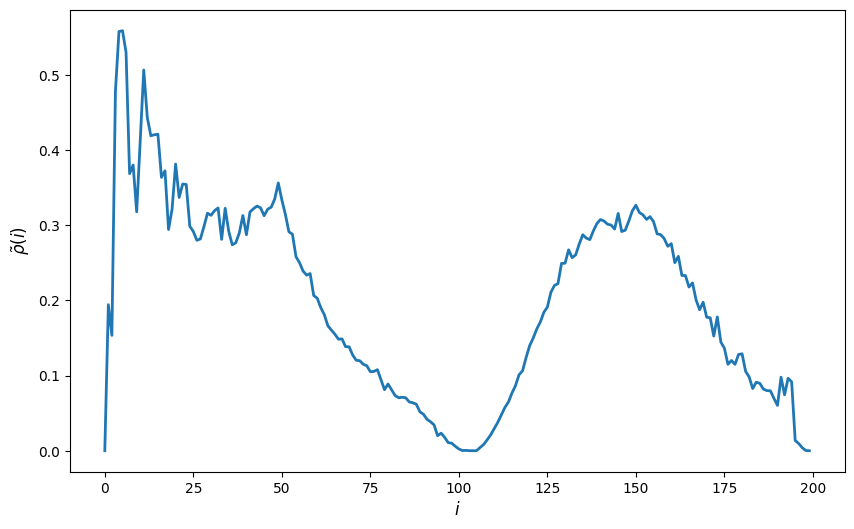

PCA_Implementation Accuracy 59.50% / Sklearn Reference Accuracy 59.50%


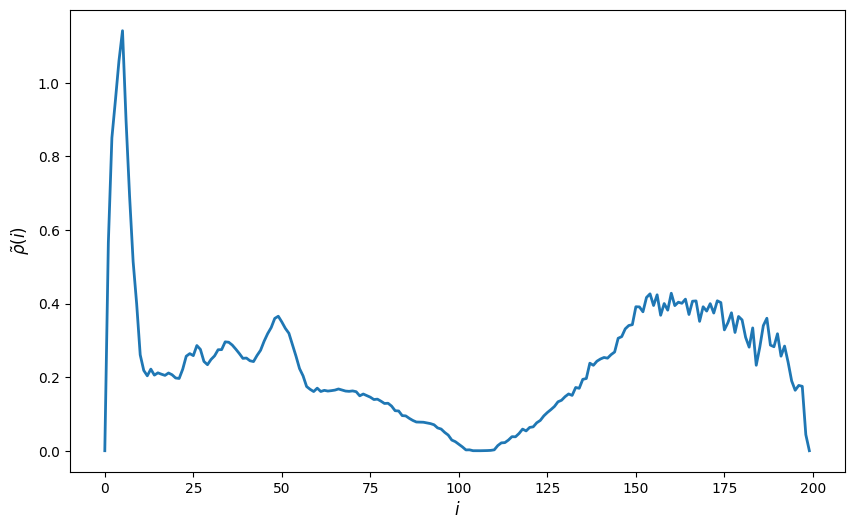

PCA_Implementation Accuracy 61.50% / Sklearn Reference Accuracy 61.00%


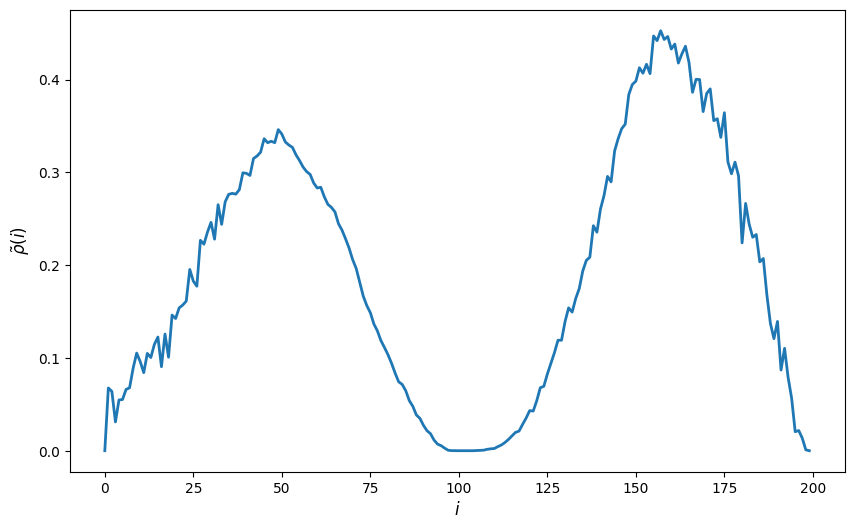

PCA_Implementation Accuracy 52.50% / Sklearn Reference Accuracy 53.50%


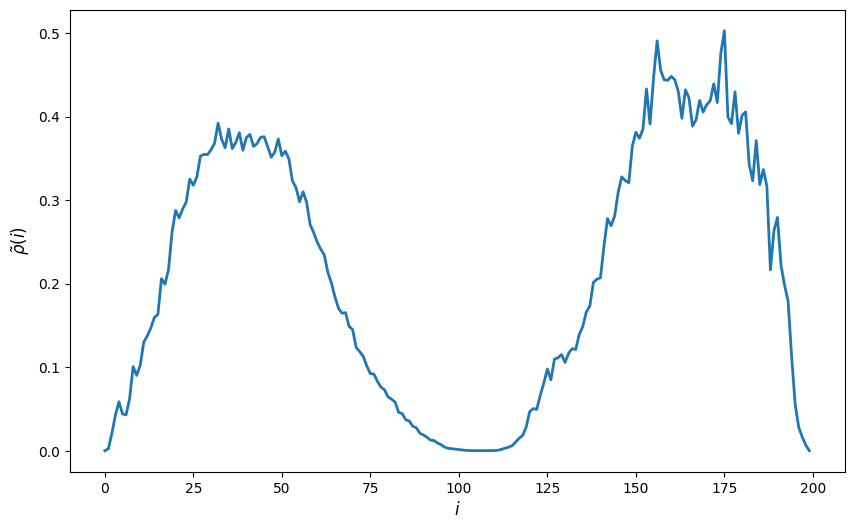

PCA_Implementation Accuracy 59.00% / Sklearn Reference Accuracy 58.00%


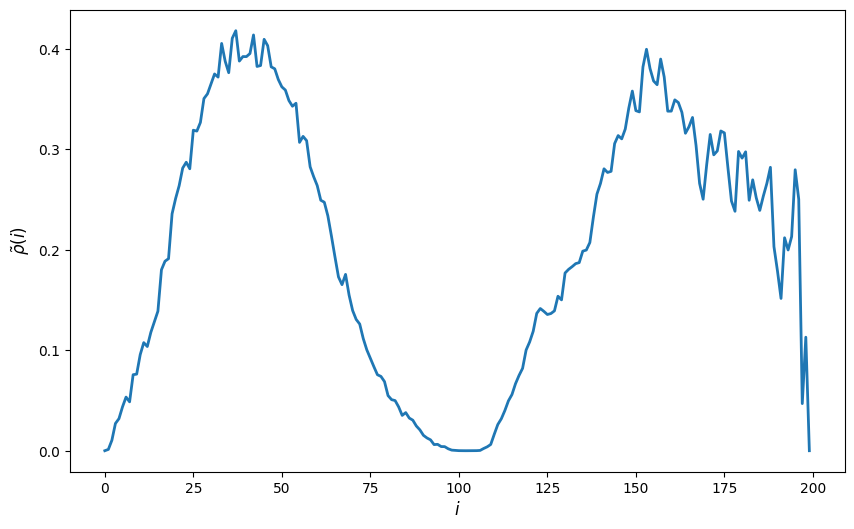

PCA_Implementation Accuracy 64.50% / Sklearn Reference Accuracy 60.00%


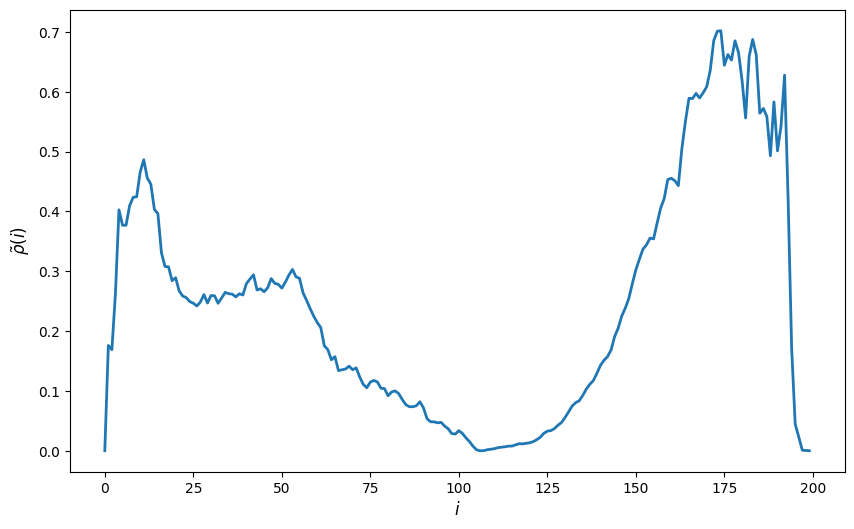

PCA_Implementation Accuracy 61.50% / Sklearn Reference Accuracy 63.50%


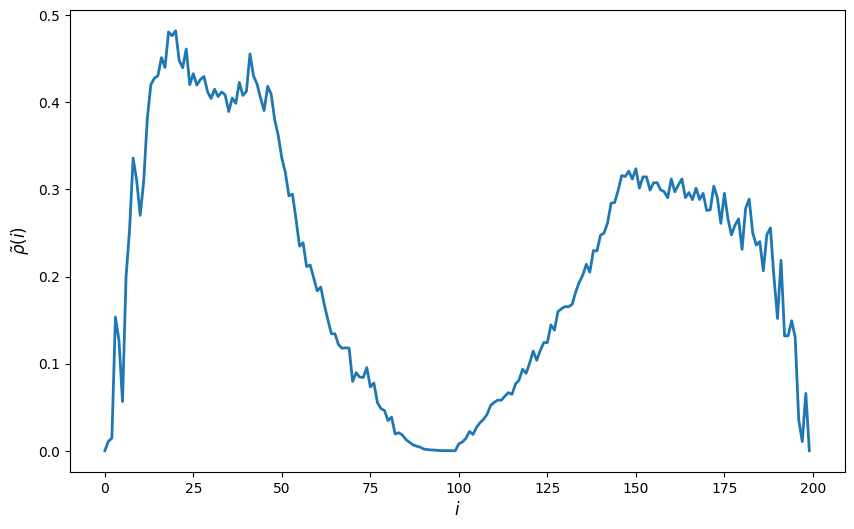

PCA_Implementation Accuracy 60.00% / Sklearn Reference Accuracy 61.00%


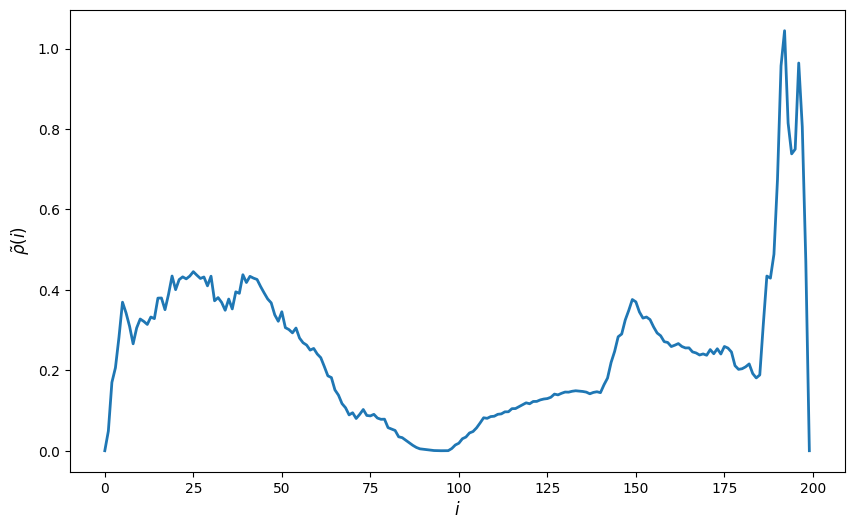

PCA_Implementation Accuracy 54.00% / Sklearn Reference Accuracy 55.00%


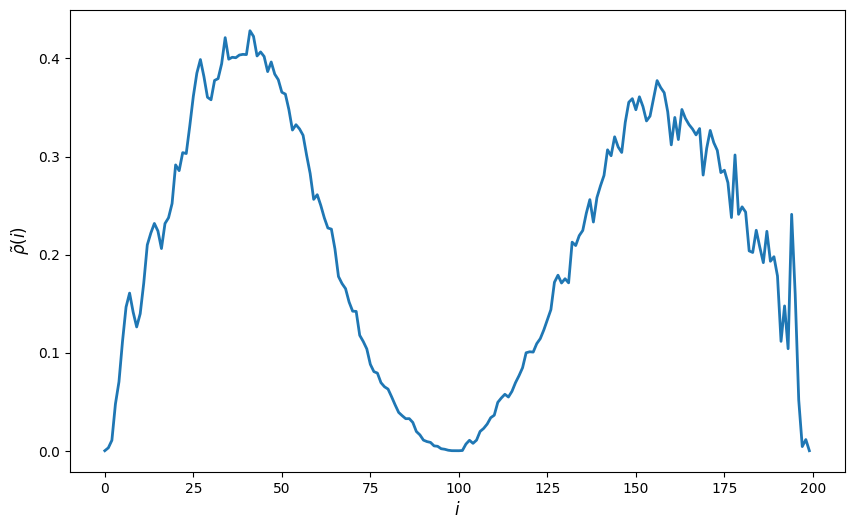


PCA_Implementation Mean Accuracy 60.15% / Sklearn Reference Mean Accuracy 60.20%

 Metric                                                                           Values
Inertia [146.15, 144.38, 147.11, 148.95, 147.41, 143.34, 144.36, 145.24, 148.87, 151.09]
     Km [146.14, 144.40, 147.18, 149.00, 147.46, 143.36, 144.30, 145.17, 148.84, 151.08]
  LowBd [143.53, 141.22, 144.64, 146.46, 144.61, 140.45, 141.13, 141.97, 146.20, 148.73]

###################################################################################################

Combination A5

PCA_Implementation Accuracy 55.80% / Sklearn Reference Accuracy 47.00%


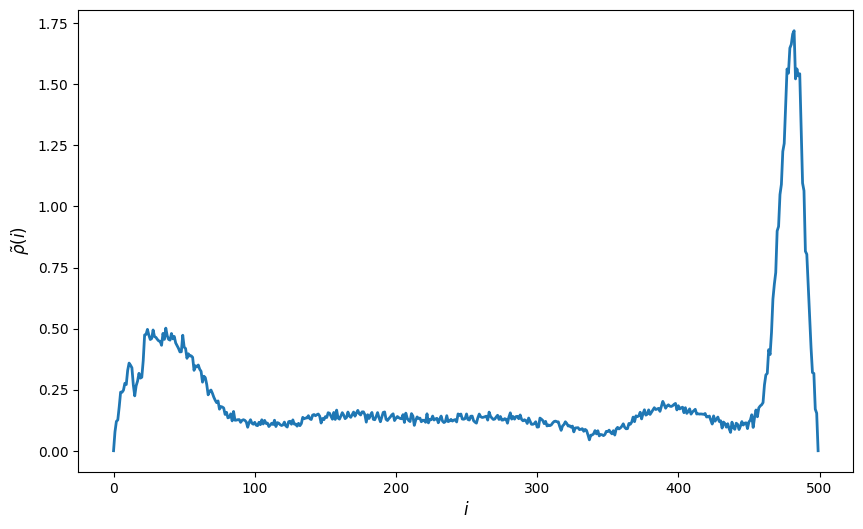

PCA_Implementation Accuracy 56.80% / Sklearn Reference Accuracy 51.60%


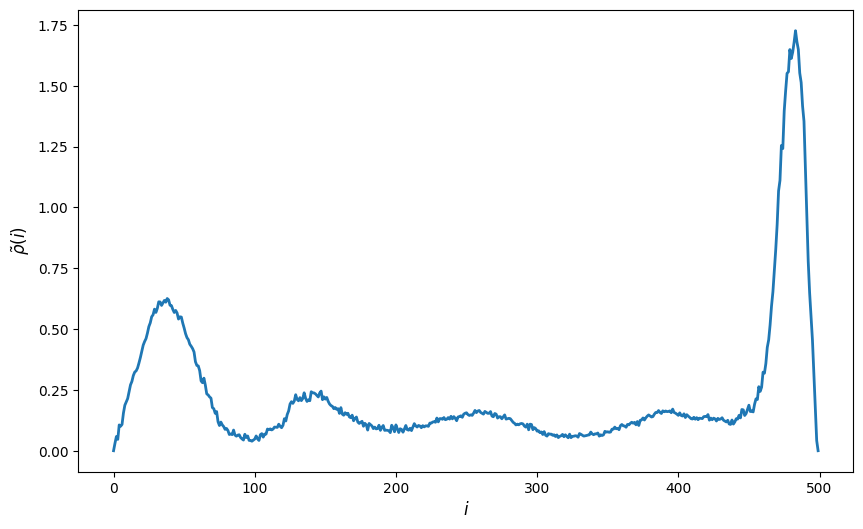

PCA_Implementation Accuracy 48.40% / Sklearn Reference Accuracy 44.20%


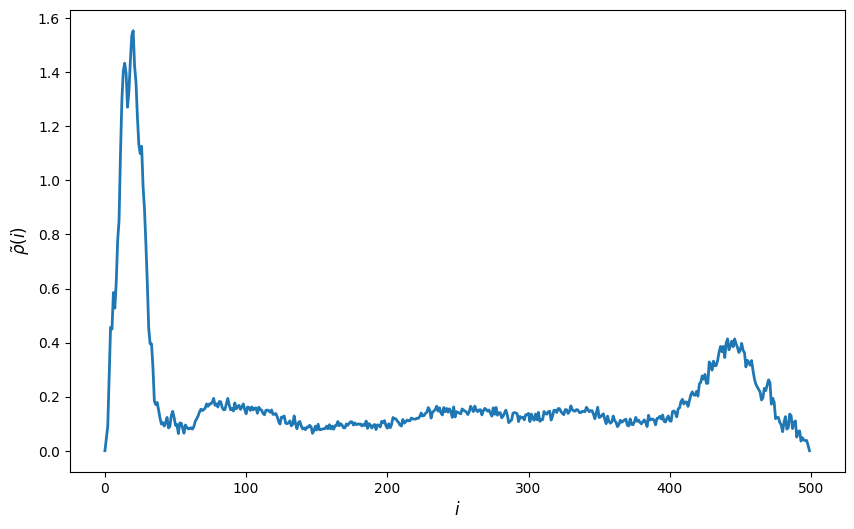

PCA_Implementation Accuracy 62.20% / Sklearn Reference Accuracy 50.40%


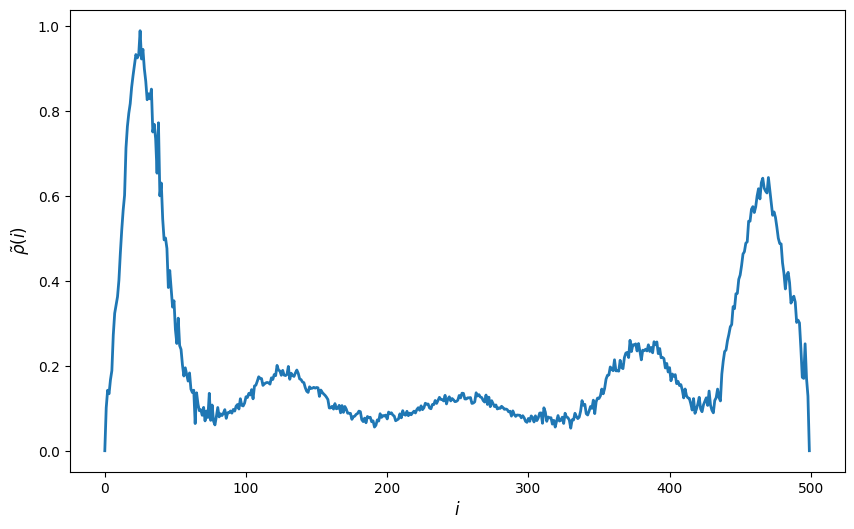

PCA_Implementation Accuracy 56.00% / Sklearn Reference Accuracy 55.60%


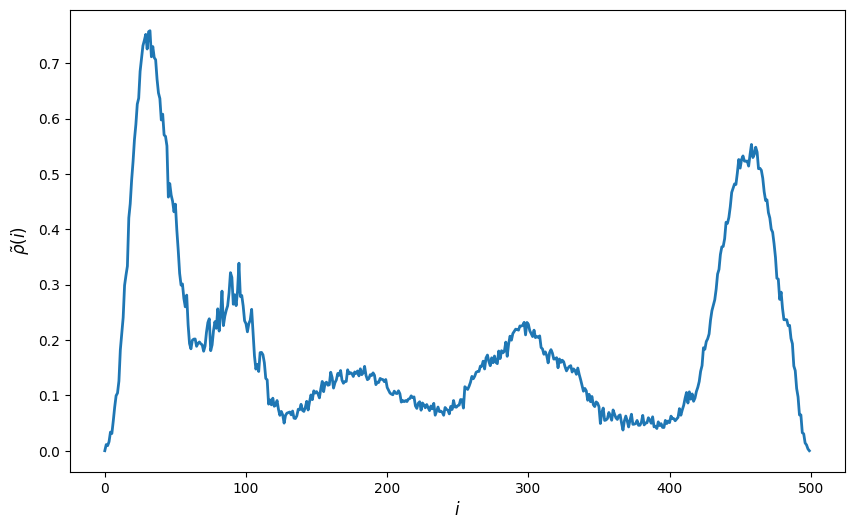

PCA_Implementation Accuracy 44.80% / Sklearn Reference Accuracy 41.60%


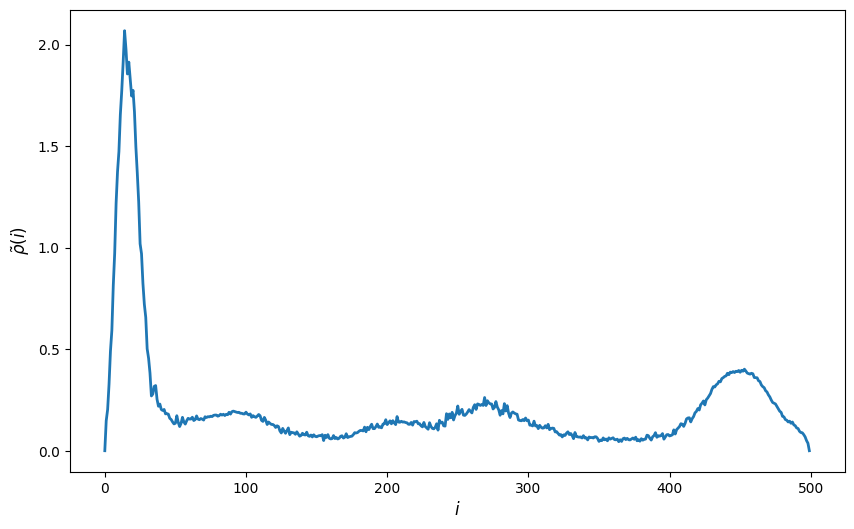

PCA_Implementation Accuracy 50.00% / Sklearn Reference Accuracy 46.20%


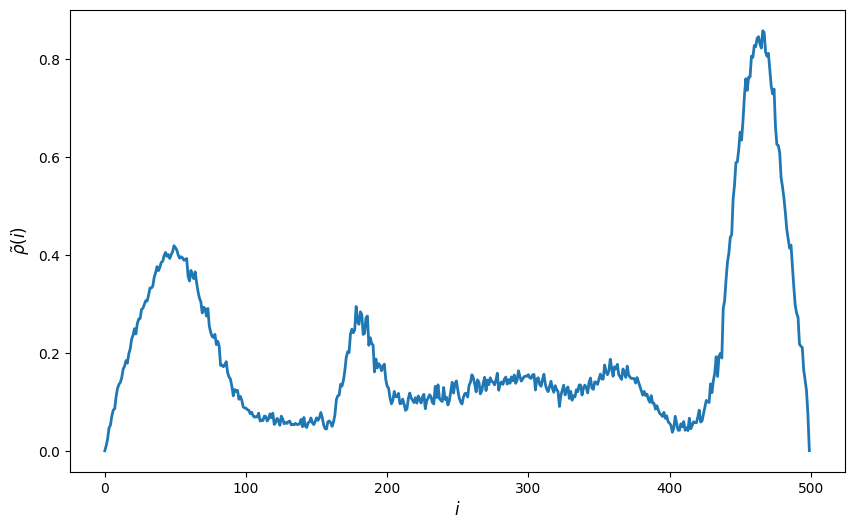

PCA_Implementation Accuracy 57.40% / Sklearn Reference Accuracy 49.00%


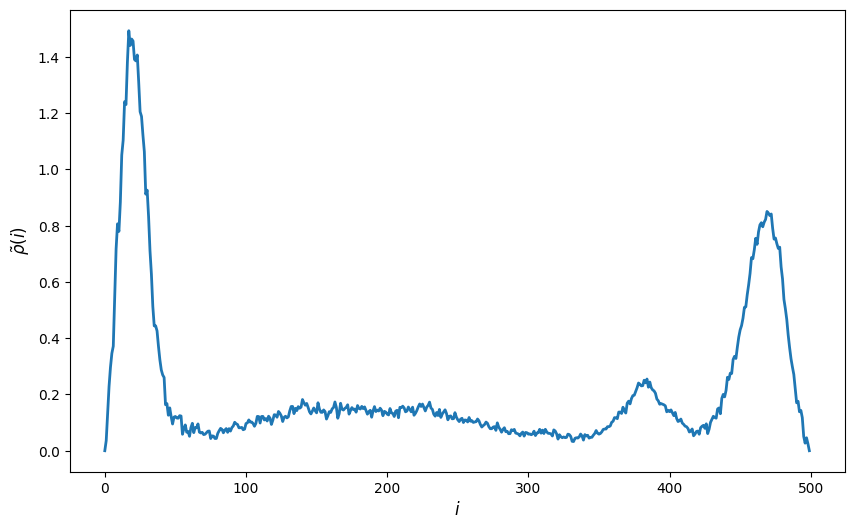

PCA_Implementation Accuracy 55.00% / Sklearn Reference Accuracy 55.80%


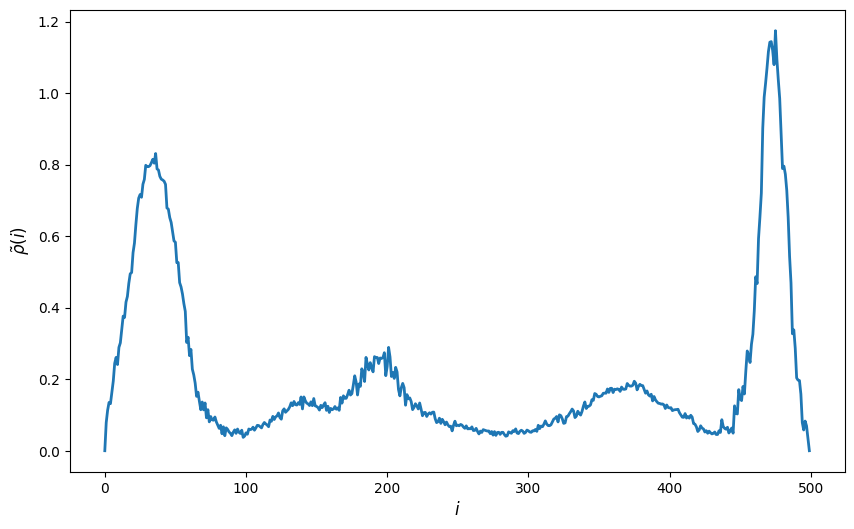

PCA_Implementation Accuracy 48.20% / Sklearn Reference Accuracy 45.00%


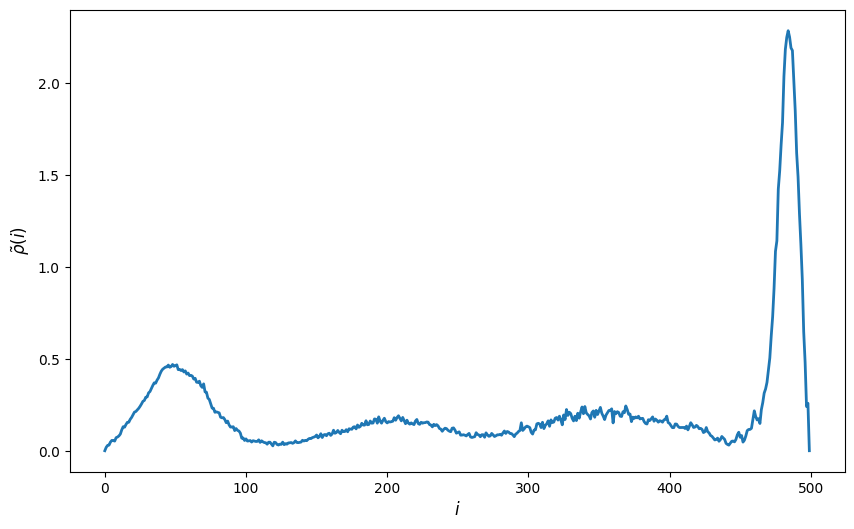


PCA_Implementation Mean Accuracy 53.46% / Sklearn Reference Mean Accuracy 48.64%

 Metric                                                                           Values
Inertia [382.59, 385.49, 381.91, 390.74, 381.59, 382.94, 381.75, 389.31, 387.90, 377.27]
     Km [391.05, 391.16, 393.23, 394.41, 392.49, 387.70, 390.92, 399.26, 396.41, 387.95]
  LowBd [369.07, 372.06, 368.66, 376.39, 369.29, 367.34, 366.88, 375.63, 374.94, 363.13]

###################################################################################################

Combination B5

PCA_Implementation Accuracy 53.80% / Sklearn Reference Accuracy 47.60%


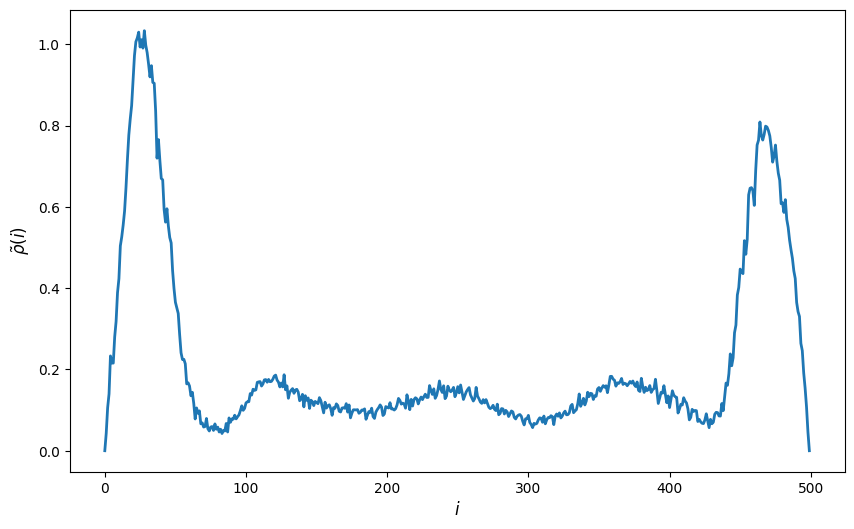

PCA_Implementation Accuracy 63.20% / Sklearn Reference Accuracy 42.20%


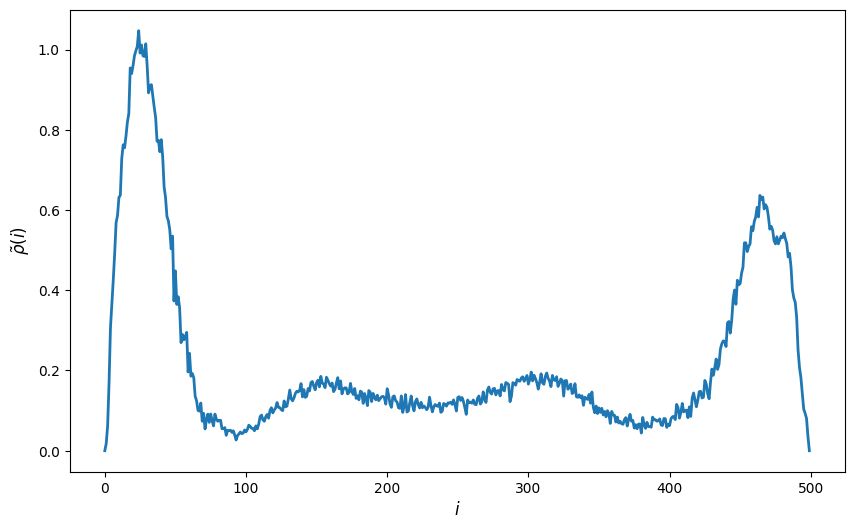

PCA_Implementation Accuracy 61.40% / Sklearn Reference Accuracy 54.20%


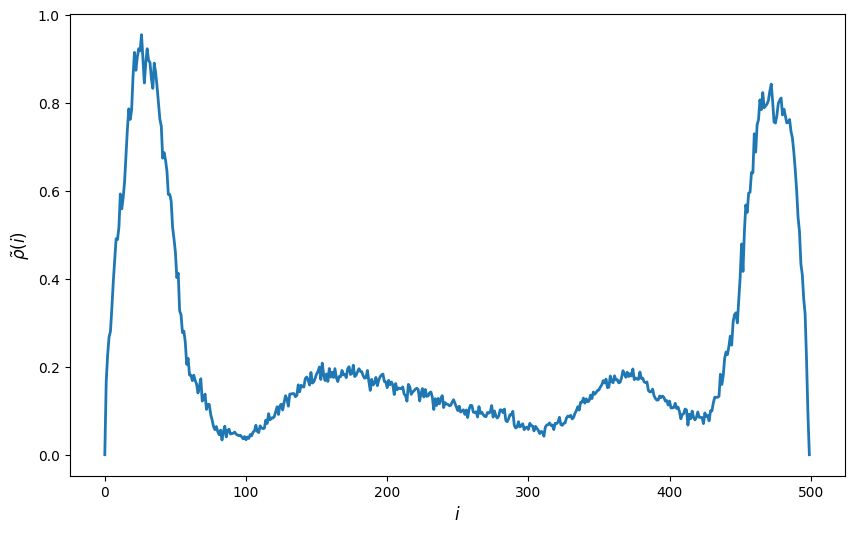

PCA_Implementation Accuracy 62.80% / Sklearn Reference Accuracy 44.40%


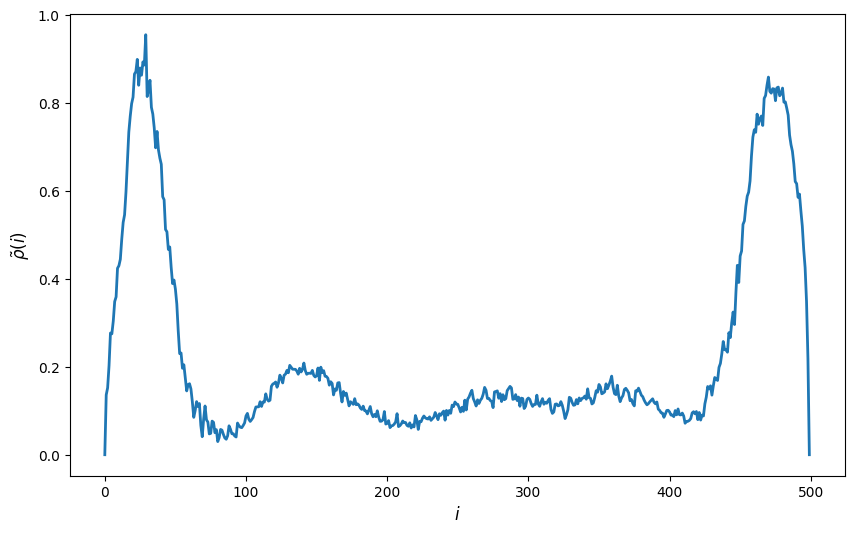

PCA_Implementation Accuracy 63.00% / Sklearn Reference Accuracy 52.00%


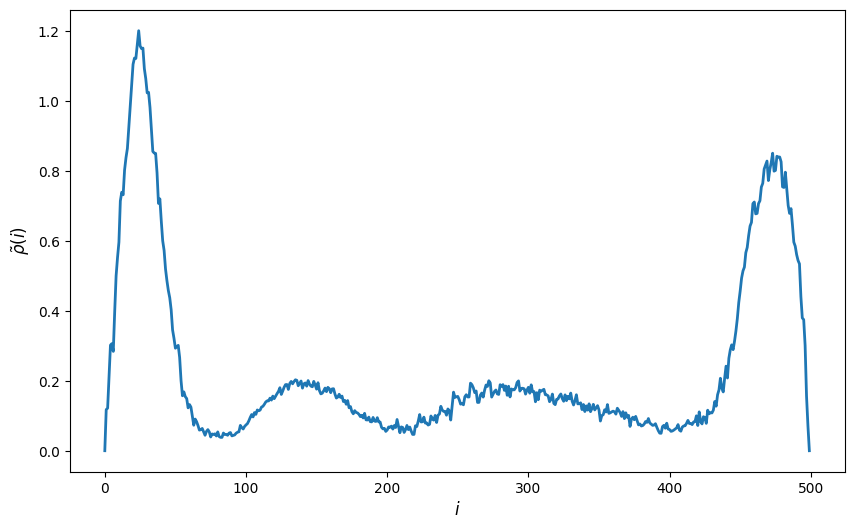

PCA_Implementation Accuracy 65.80% / Sklearn Reference Accuracy 44.00%


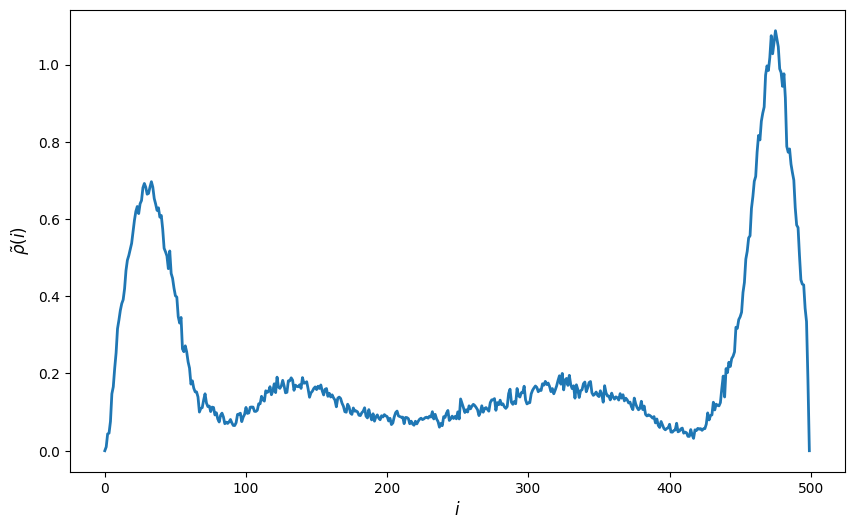

PCA_Implementation Accuracy 52.60% / Sklearn Reference Accuracy 39.60%


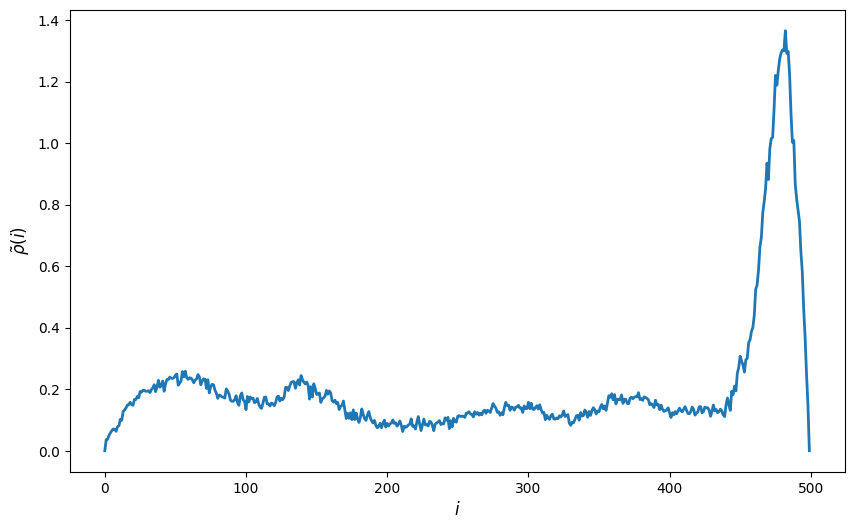

PCA_Implementation Accuracy 48.20% / Sklearn Reference Accuracy 44.60%


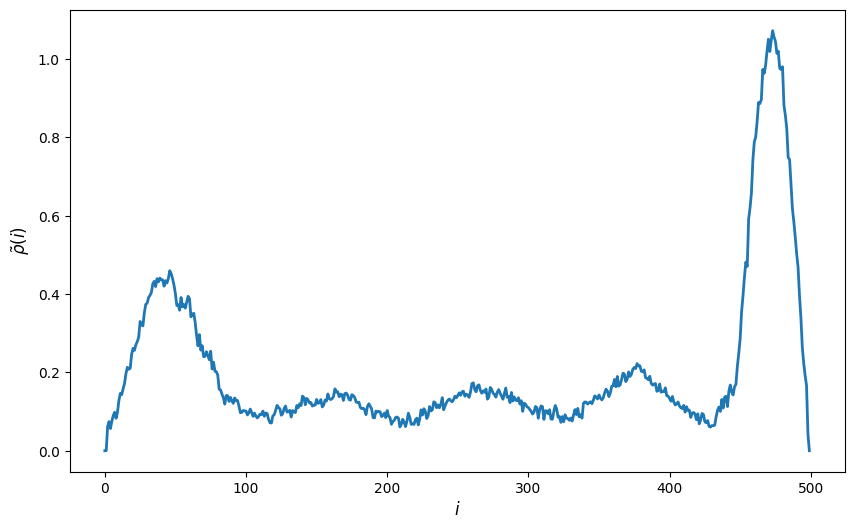

PCA_Implementation Accuracy 33.40% / Sklearn Reference Accuracy 44.00%


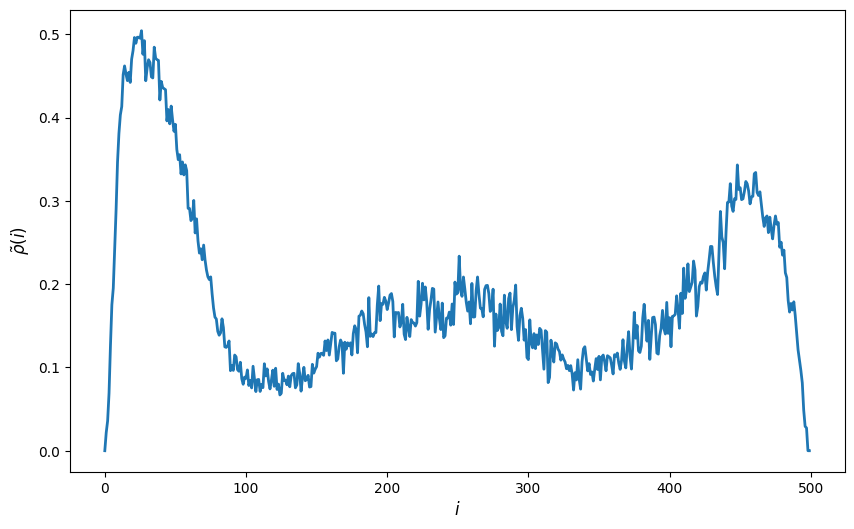

PCA_Implementation Accuracy 59.00% / Sklearn Reference Accuracy 48.20%


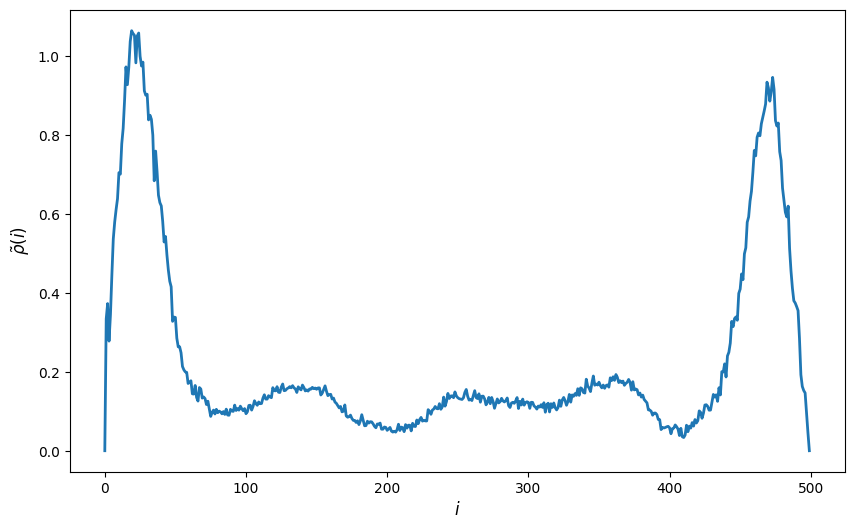


PCA_Implementation Mean Accuracy 56.32% / Sklearn Reference Mean Accuracy 46.08%

 Metric                                                                           Values
Inertia [389.16, 386.82, 388.57, 389.48, 387.49, 383.34, 388.03, 392.59, 382.13, 391.49]
     Km [394.32, 396.26, 392.89, 393.04, 395.94, 388.55, 395.83, 397.03, 395.05, 394.10]
  LowBd [374.98, 373.02, 373.89, 374.77, 373.74, 367.89, 374.51, 379.21, 366.71, 376.82]

###################################################################################################



In [16]:
for combination in ["A2", "B2", "A5", "B5"]:
    print(f"Combination {combination}\n")
    K = 2 if combination in ["A2", "B2"] else 5
    accuracy_list = []
    accuracy_reference_list = []
    km_list = []
    best_inertia_list = []
    lower_bound_list = []
    for _ in range(10):
        X, true_labels = get_data_papers(combination)
        C, km, lower_bound, smoothed_rho = run_clustering(X, K)
        
        pred_labels = get_pred_labels(C, K*100)
    
        kmeans = KMeans(n_clusters=K, init="random", random_state=42)
        kmeans.fit(X.T)
        pred_reference = kmeans.labels_
        
        acc = get_clustering_accuracy(true_labels, pred_labels)
        acc_reference = get_clustering_accuracy(true_labels, pred_reference)
        print(f"PCA_Implementation Accuracy {100*acc:.2f}% / Sklearn Reference Accuracy {100*acc_reference:.2f}%")
        accuracy_list.append(acc)
        accuracy_reference_list.append(acc_reference)
        km_list.append(f"{km:.2f}")
        lower_bound_list.append(f"{lower_bound:.2f}")
        best_inertia_list.append(f"{kmeans.inertia_:.2f}")

        plt.figure(figsize=(10, 6))
        plt.plot(range(len(smoothed_rho)), smoothed_rho, linewidth=2)

        plt.xlabel(r"$i$", fontsize=12)
        plt.ylabel(r"$\tilde{\rho}(i)$", fontsize=12)

        plt.show()
    
    mean_acc = np.mean(accuracy_list)
    mean_acc_reference = np.mean(accuracy_reference_list)
    data = { "Metric": ["Inertia", "Km", "LowBd"], "Values": [best_inertia_list, km_list, lower_bound_list]}
    df = pd.DataFrame(data)

    print(f"\nPCA_Implementation Mean Accuracy {100*mean_acc:.2f}% / Sklearn Reference Mean Accuracy {100*mean_acc_reference:.2f}%\n")
    print(df.to_string(index=False))
    print("\n###################################################################################################\n")

### Testing on new data: gene expression cancer RNA-Seq dataset

In [4]:
from gene_data import get_data_gene

In [5]:
X_gene, true_labels_gene, K_gene = get_data_gene()

C, km, lower_bound, smoothed_rho = run_clustering(X_gene, K_gene)

pred_labels = get_pred_labels(C, X_gene.shape[1])

kmeans = KMeans(n_clusters=K_gene, init="random", random_state=42)
kmeans.fit(X_gene.T)
pred_reference = kmeans.labels_

acc = get_clustering_accuracy(true_labels_gene, pred_labels)
acc_reference = get_clustering_accuracy(true_labels_gene, pred_reference)
print(f"PCA_Implementation Accuracy {100*acc:.2f}% / Sklearn Reference Accuracy {100*acc_reference:.2f}%\n")

print(f"Inertia: {kmeans.inertia_:.2e}")
print(f"Km: {km:.2e}")
print(f"Lower Bound: {lower_bound:.2e}")


PCA_Implementation Accuracy 82.65% / Sklearn Reference Accuracy 99.50%

Inertia: 1.78e+07
Km: 1.96e+07
Lower Bound: 1.67e+07


# Kernel PCA version
### Newspaper dataset

In [6]:
from kernel_pca_implementation import run_clustering

In [7]:
for combination in ["A2", "B2", "A5", "B5"]:
    print(f"Combination {combination}\n")
    K = 2 if combination in ["A2", "B2"] else 5
    accuracy_list = []
    accuracy_reference_list = []
    for _ in range(10):
        X, true_labels = get_data_papers(combination)
        C, km, smoothed_rho = run_clustering(X, K, kernel = "rbf", gamma = 0.1)
        
        pred_labels = get_pred_labels(C, K*100)
    
        kmeans = KMeans(n_clusters=K, init="random", random_state=42)
        kmeans.fit(X.T)
        pred_reference = kmeans.labels_
        
        acc = get_clustering_accuracy(true_labels, pred_labels)
        acc_reference = get_clustering_accuracy(true_labels, pred_reference)
        print(f"PCA_Implementation Accuracy {100*acc:.2f}% / Sklearn Reference Accuracy {100*acc_reference:.2f}%")
        accuracy_list.append(acc)
        accuracy_reference_list.append(acc_reference)
        km_list.append(f"{km:.2f}")
        lower_bound_list.append(f"{lower_bound:.2f}")
        best_inertia_list.append(f"{kmeans.inertia_:.2f}")
    
    mean_acc = np.mean(accuracy_list)
    mean_acc_reference = np.mean(accuracy_reference_list)

    print(f"\nPCA_Implementation Mean Accuracy {100*mean_acc:.2f}% / Sklearn Reference Mean Accuracy {100*mean_acc_reference:.2f}%\n")
    print("\n########################################################\n")

Combination A2

PCA_Implementation Accuracy 78.50% / Sklearn Reference Accuracy 90.00%
PCA_Implementation Accuracy 69.50% / Sklearn Reference Accuracy 71.00%
PCA_Implementation Accuracy 73.50% / Sklearn Reference Accuracy 70.50%
PCA_Implementation Accuracy 74.50% / Sklearn Reference Accuracy 69.50%
PCA_Implementation Accuracy 73.50% / Sklearn Reference Accuracy 61.50%
PCA_Implementation Accuracy 77.50% / Sklearn Reference Accuracy 87.50%
PCA_Implementation Accuracy 81.00% / Sklearn Reference Accuracy 89.00%
PCA_Implementation Accuracy 79.00% / Sklearn Reference Accuracy 87.00%
PCA_Implementation Accuracy 70.00% / Sklearn Reference Accuracy 72.00%
PCA_Implementation Accuracy 74.50% / Sklearn Reference Accuracy 74.00%

PCA_Implementation Mean Accuracy 75.15% / Sklearn Reference Mean Accuracy 77.20%


########################################################

Combination B2

PCA_Implementation Accuracy 60.00% / Sklearn Reference Accuracy 64.00%
PCA_Implementation Accuracy 61.00% / Sklearn 

### Gene dataset

In [8]:
C, km, smoothed_rho = run_clustering(X_gene, K_gene, kernel = "rbf", gamma = 0.1)

pred_labels = get_pred_labels(C, X_gene.shape[1])

kmeans = KMeans(n_clusters=K_gene, init="random", random_state=42)
kmeans.fit(X_gene.T)
pred_reference = kmeans.labels_

acc = get_clustering_accuracy(true_labels_gene, pred_labels)
acc_reference = get_clustering_accuracy(true_labels_gene, pred_reference)
print(f"PCA_Implementation Accuracy {100*acc:.2f}% / Sklearn Reference Accuracy {100*acc_reference:.2f}%\n")


PCA_Implementation Accuracy 25.97% / Sklearn Reference Accuracy 99.50%



# Sparse PCA version
### Newspaper dataset

In [9]:
from sparse_pca_implementation import run_clustering

In [10]:
for combination in ["A2", "B2", "A5", "B5"]:
    print(f"Combination {combination}\n")
    K = 2 if combination in ["A2", "B2"] else 5
    accuracy_list = []
    accuracy_reference_list = []
    for _ in range(10):
        X, true_labels = get_data_papers(combination)
        C, km, smoothed_rho = run_clustering(X, K)
        
        pred_labels = get_pred_labels(C, K*100)
    
        kmeans = KMeans(n_clusters=K, init="random", random_state=42)
        kmeans.fit(X.T)
        pred_reference = kmeans.labels_
        
        acc = get_clustering_accuracy(true_labels, pred_labels)
        acc_reference = get_clustering_accuracy(true_labels, pred_reference)
        print(f"PCA_Implementation Accuracy {100*acc:.2f}% / Sklearn Reference Accuracy {100*acc_reference:.2f}%")
        accuracy_list.append(acc)
        accuracy_reference_list.append(acc_reference)
        km_list.append(f"{km:.2f}")
        lower_bound_list.append(f"{lower_bound:.2f}")
        best_inertia_list.append(f"{kmeans.inertia_:.2f}")
    
    mean_acc = np.mean(accuracy_list)
    mean_acc_reference = np.mean(accuracy_reference_list)

    print(f"\nPCA_Implementation Mean Accuracy {100*mean_acc:.2f}% / Sklearn Reference Mean Accuracy {100*mean_acc_reference:.2f}%\n")
    print("\n########################################################\n")

Combination A2

PCA_Implementation Accuracy 62.00% / Sklearn Reference Accuracy 88.50%
PCA_Implementation Accuracy 58.00% / Sklearn Reference Accuracy 63.00%
PCA_Implementation Accuracy 59.50% / Sklearn Reference Accuracy 66.50%
PCA_Implementation Accuracy 59.50% / Sklearn Reference Accuracy 95.00%
PCA_Implementation Accuracy 61.50% / Sklearn Reference Accuracy 82.00%
PCA_Implementation Accuracy 62.00% / Sklearn Reference Accuracy 96.50%
PCA_Implementation Accuracy 60.50% / Sklearn Reference Accuracy 80.50%
PCA_Implementation Accuracy 67.50% / Sklearn Reference Accuracy 82.00%
PCA_Implementation Accuracy 50.00% / Sklearn Reference Accuracy 72.50%
PCA_Implementation Accuracy 52.00% / Sklearn Reference Accuracy 77.00%

PCA_Implementation Mean Accuracy 59.25% / Sklearn Reference Mean Accuracy 80.35%


########################################################

Combination B2

PCA_Implementation Accuracy 52.50% / Sklearn Reference Accuracy 55.00%
PCA_Implementation Accuracy 53.50% / Sklearn 

### Gene dataset

In [11]:
# Ran for 2h and didn't produce the result
"""
C, km, smoothed_rho = run_clustering(X_gene, K_gene)

pred_labels = get_pred_labels(C, X_gene.shape[1])

kmeans = KMeans(n_clusters=K_gene, init="random", random_state=42)
kmeans.fit(X_gene.T)
pred_reference = kmeans.labels_

acc = get_clustering_accuracy(true_labels_gene, pred_labels)
acc_reference = get_clustering_accuracy(true_labels_gene, pred_reference)
print(f"PCA_Implementation Accuracy {100*acc:.2f}% / Sklearn Reference Accuracy {100*acc_reference:.2f}%\n")
"""


'\nC, km, smoothed_rho = run_clustering(X_gene, K_gene)\n\npred_labels = get_pred_labels(C, X_gene.shape[1])\n\nkmeans = KMeans(n_clusters=K_gene, init="random", random_state=42)\nkmeans.fit(X_gene.T)\npred_reference = kmeans.labels_\n\nacc = get_clustering_accuracy(true_labels_gene, pred_labels)\nacc_reference = get_clustering_accuracy(true_labels_gene, pred_reference)\nprint(f"PCA_Implementation Accuracy {100*acc:.2f}% / Sklearn Reference Accuracy {100*acc_reference:.2f}%\n")\n'